In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error, r2_score

from IPython.core.display import display, HTML

In [3]:
df = pd.read_csv("air_conditioner_prices_dataset.csv")

In [4]:
df.head()

,Brand,Capacity (BTUs),EER/SEER,Type,Features,Location,Age (years),Price ($)
0,Brand A,18000,14.6,Portable,Quiet,India,3,239
1,Brand C,8000,12.3,Portable,WiFi,USA,4,348
2,Brand B,15000,12.4,Window,WiFi,Europe,4,325
3,Brand C,18000,15.6,Split,Standard,Australia,4,480
4,Brand C,12000,17.5,Portable,"Inverter Technology, WiFi",Australia,2,881


In [5]:
df.describe()

,Capacity (BTUs),EER/SEER,Age (years),Price ($)
count,200.000000,200.000000,200.000000,200.000000
mean,12305.000000,16.112500,2.360000,604.850000
std,3507.633456,2.386687,1.129949,222.109931
min,8000.000000,12.000000,1.000000,203.000000
25%,10000.000000,13.850000,1.000000,435.500000
50%,12000.000000,16.400000,2.000000,592.500000
75%,15000.000000,18.050000,3.000000,802.500000
max,18000.000000,20.000000,4.000000,998.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            200 non-null    object 
 1   Capacity (BTUs)  200 non-null    int64  
 2   EER/SEER         200 non-null    float64
 3   Type             200 non-null    object 
 4   Features         200 non-null    object 
 5   Location         200 non-null    object 
 6   Age (years)      200 non-null    int64  
 7   Price ($)        200 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 12.6+ KB


In [7]:
df.isnull().sum(axis=0)

Brand              0
Capacity (BTUs)    0
EER/SEER           0
Type               0
Features           0
Location           0
Age (years)        0
Price ($)          0
dtype: int64

In [8]:
cats = ["Brand", "Type", "Features", "Location"]
nums = [i for i in df.columns if i not in cats]

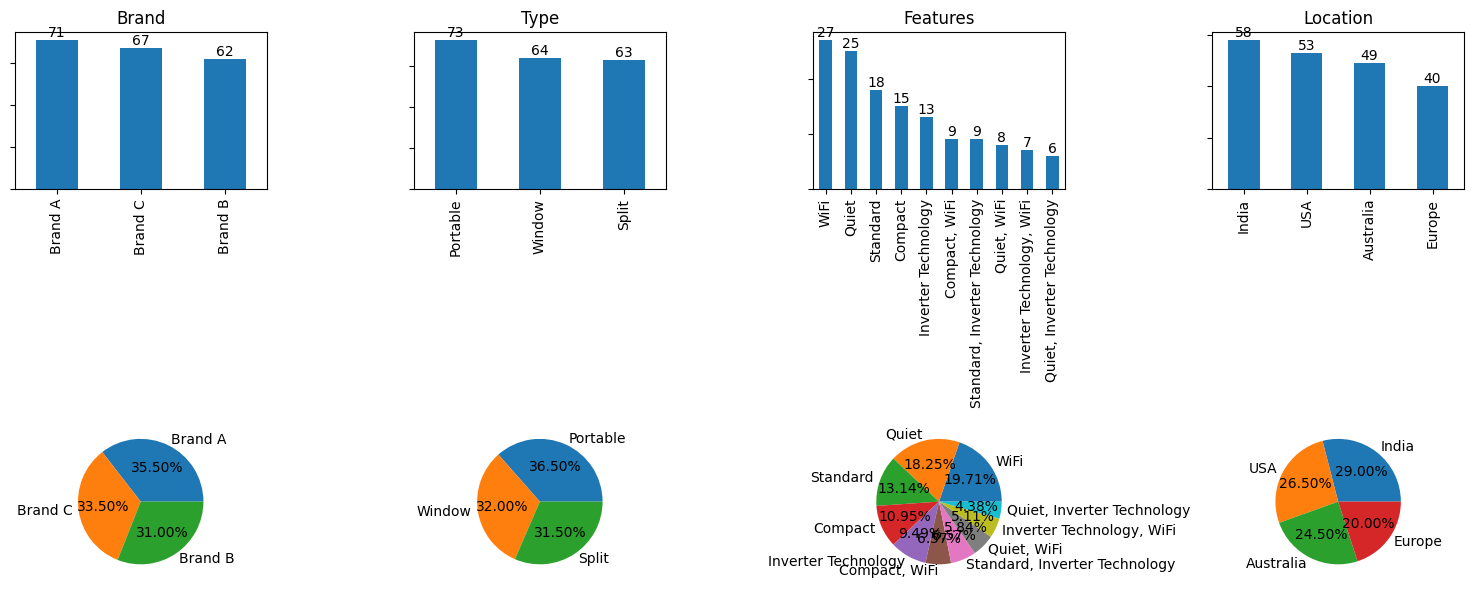

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))

for i, j in enumerate(cats):
    index = 0

    count = df[j].value_counts()
    if len(count) > 10:
        count = count[:10]

    count.plot(kind="bar", ax=axes[index][i])
    for container in axes[index][i].containers:
        axes[index][i].bar_label(container)
    axes[index][i].set_yticklabels(())
    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")
    axes[index][i].set_title(j)

    index += 1

    count.plot(kind="pie", ax=axes[index][i], autopct="%0.2f%%")
    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")

plt.tight_layout()
plt.show()

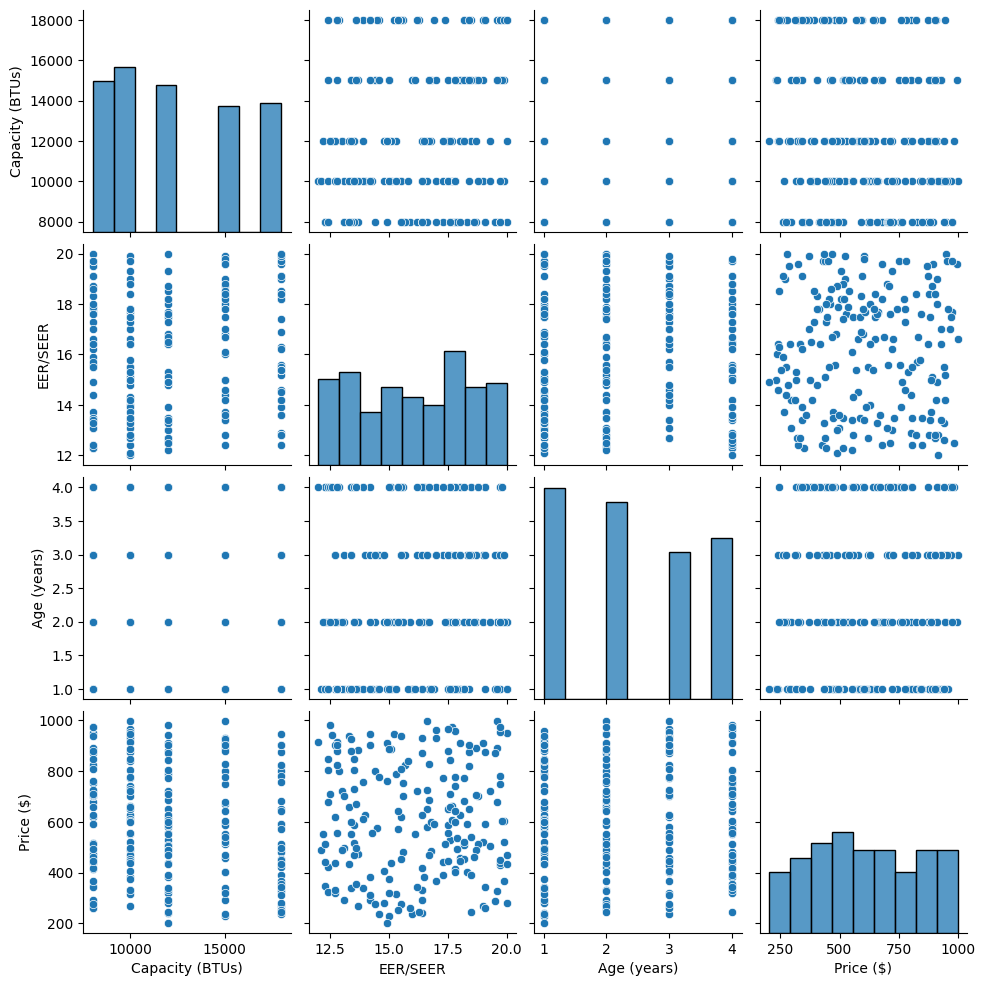

In [10]:
sns.pairplot(df, vars=nums)
plt.show()

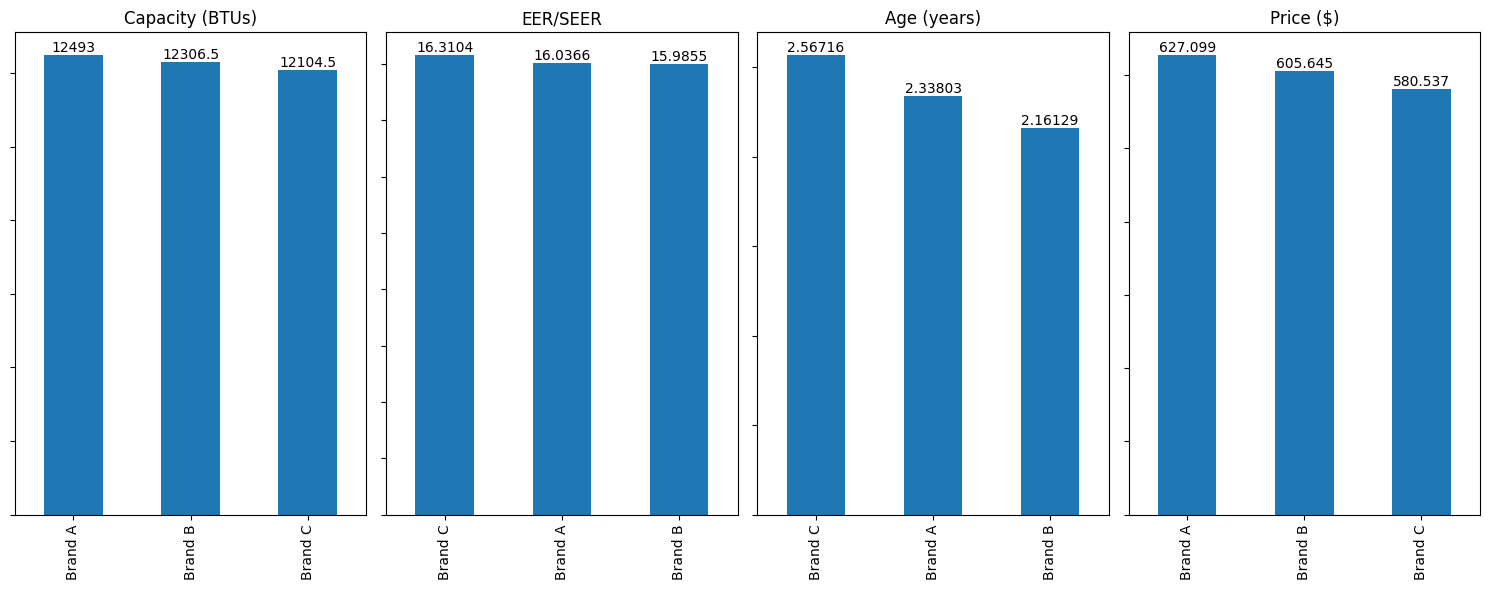

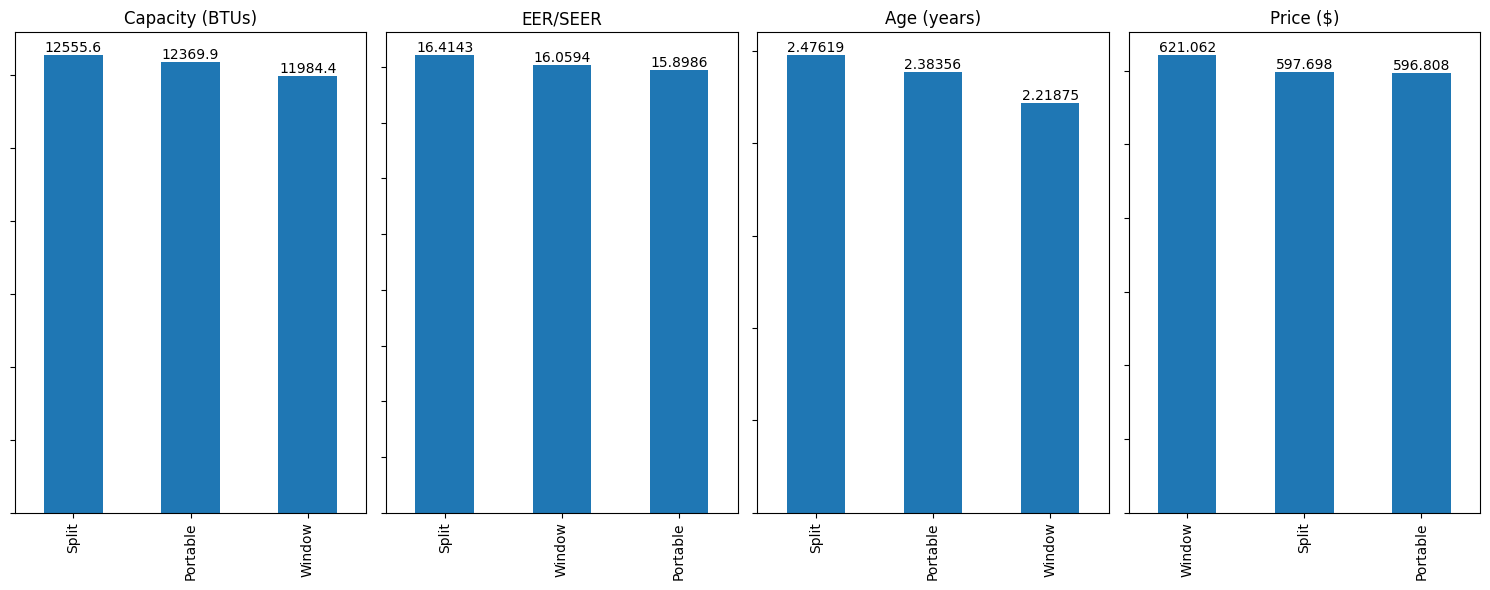

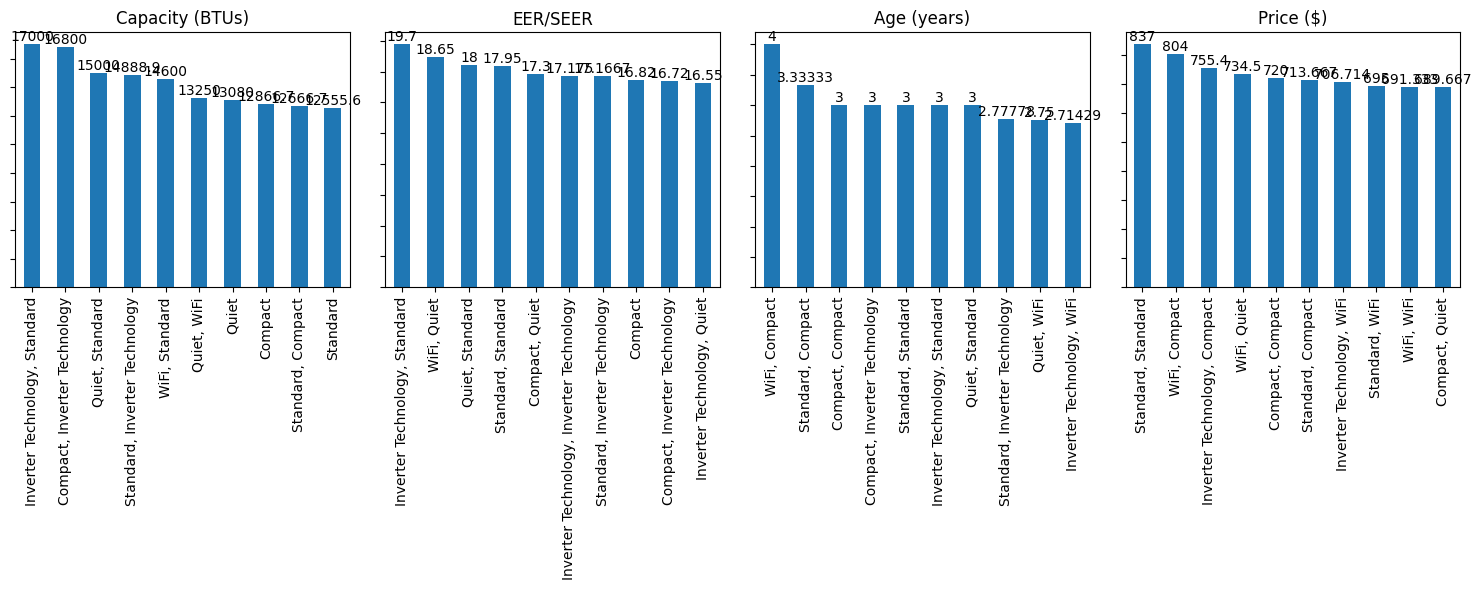

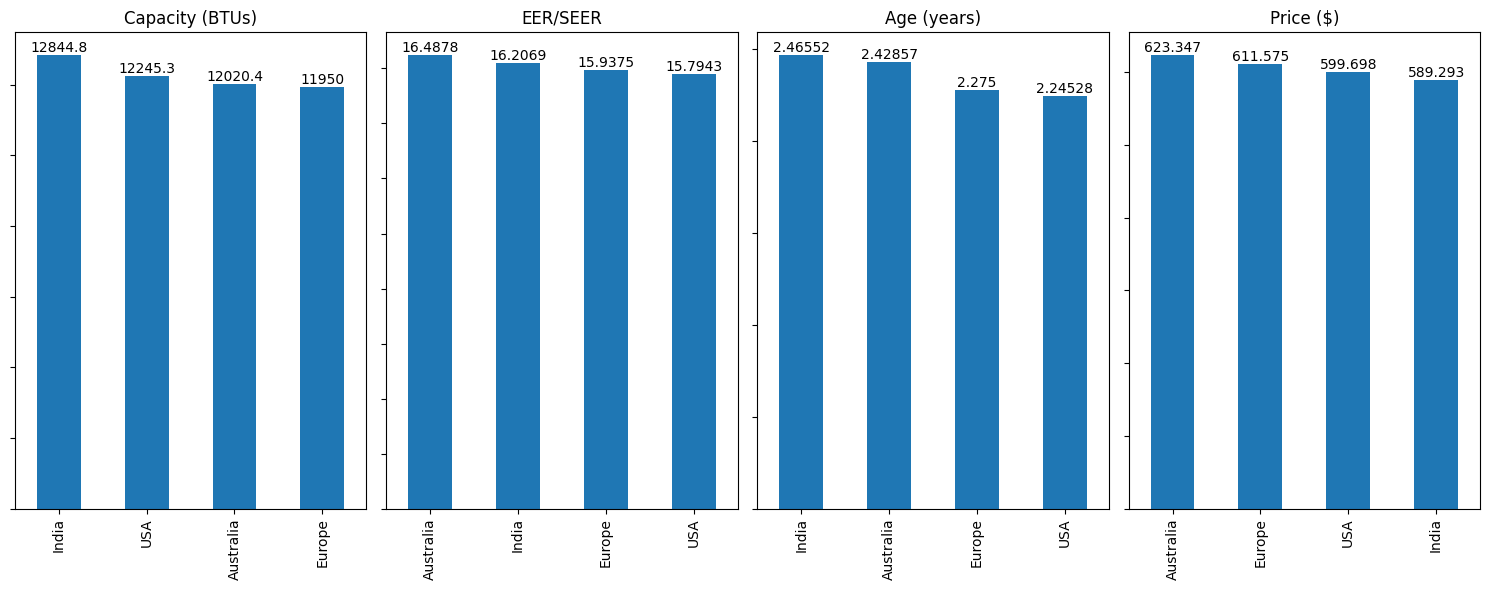

In [11]:

for i in cats:
    display(HTML("<h2>{}</h2>".format(i)))
    fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
    grouped = df.groupby(i)
    for j, k in enumerate(nums):

        mean = grouped[k].mean()

        mean = mean.sort_values(ascending=False)

        mean[:10].plot(kind="bar", ax=axes[j])

        for container in axes[j].containers:
            axes[j].bar_label(container)
        axes[j].set_yticklabels(())
        axes[j].set_ylabel("")
        axes[j].set_xlabel("")
        axes[j].set_title(k)

    plt.tight_layout()
    plt.show()

In [12]:
df["Feature One"] = ""
df["Feature Two"] = ""

for i in range(df.shape[0]):
    features = list(set(df.iloc[i, 4].split(", ")))

    df.iloc[i, -2] = features[0]
    if len(features) > 1:
        df.iloc[i, -1] = features[1]
    else:
        df.iloc[i, -1] = "None"

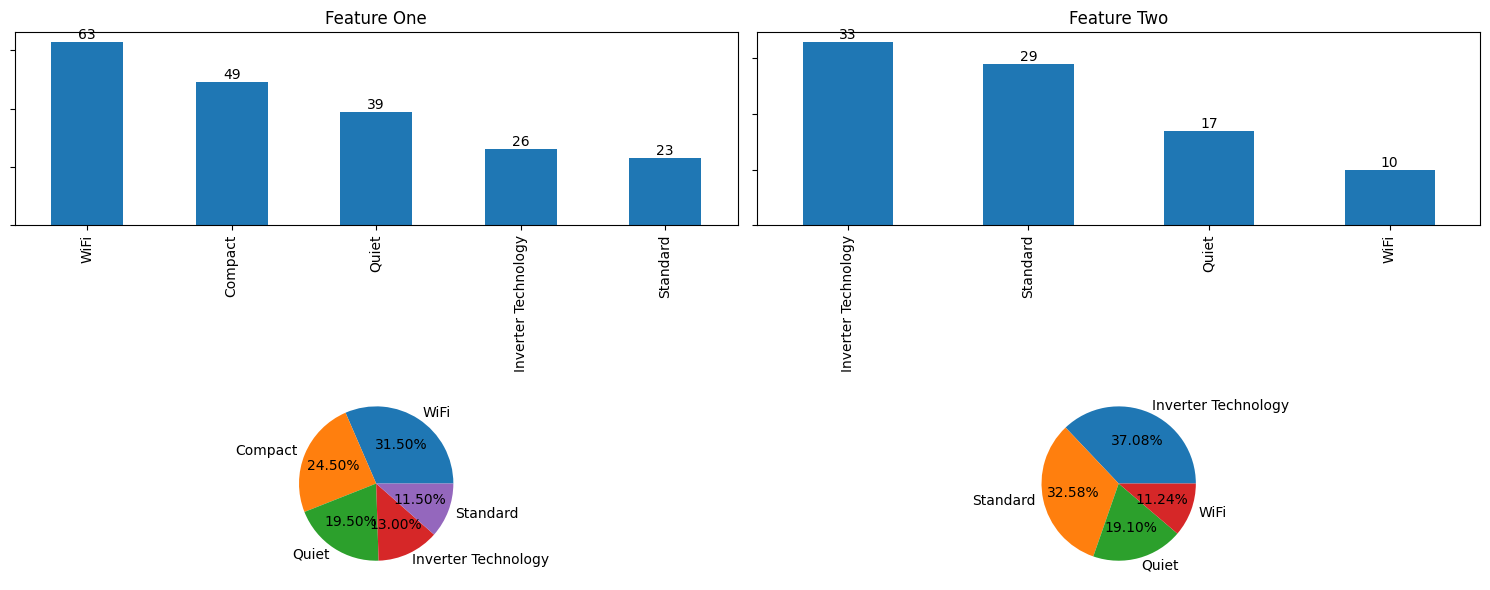

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))
feats = ["Feature One", "Feature Two"]
for i, j in enumerate(feats):
    temp_df = df.copy()
    if j == "Feature Two":
        temp_df = temp_df[temp_df["Feature Two"] != "None"]
    index = 0

    count = temp_df[j].value_counts()

    count[:10].plot(kind="bar", ax=axes[index][i])
    for container in axes[index][i].containers:
        axes[index][i].bar_label(container)
    axes[index][i].set_yticklabels(())
    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")
    axes[index][i].set_title(j)

    index += 1

    count[:10].plot(kind="pie", ax=axes[index][i], autopct="%0.2f%%")
    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")

plt.tight_layout()
plt.show()

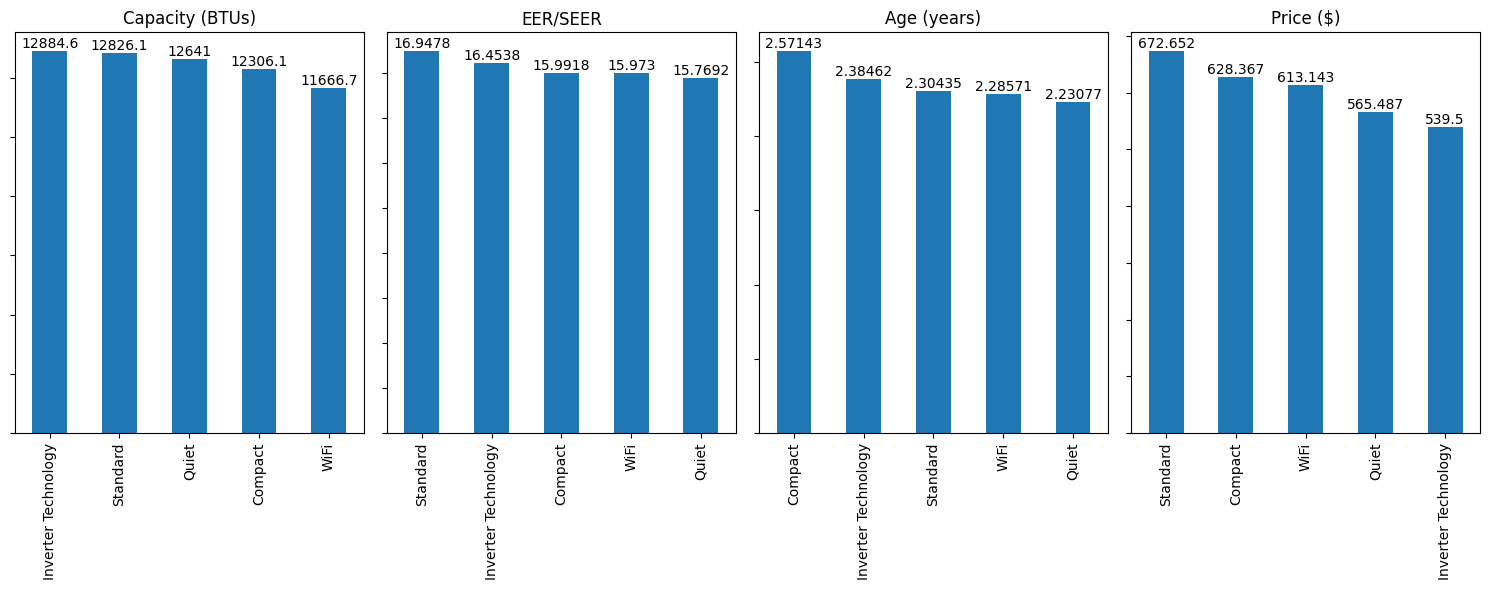

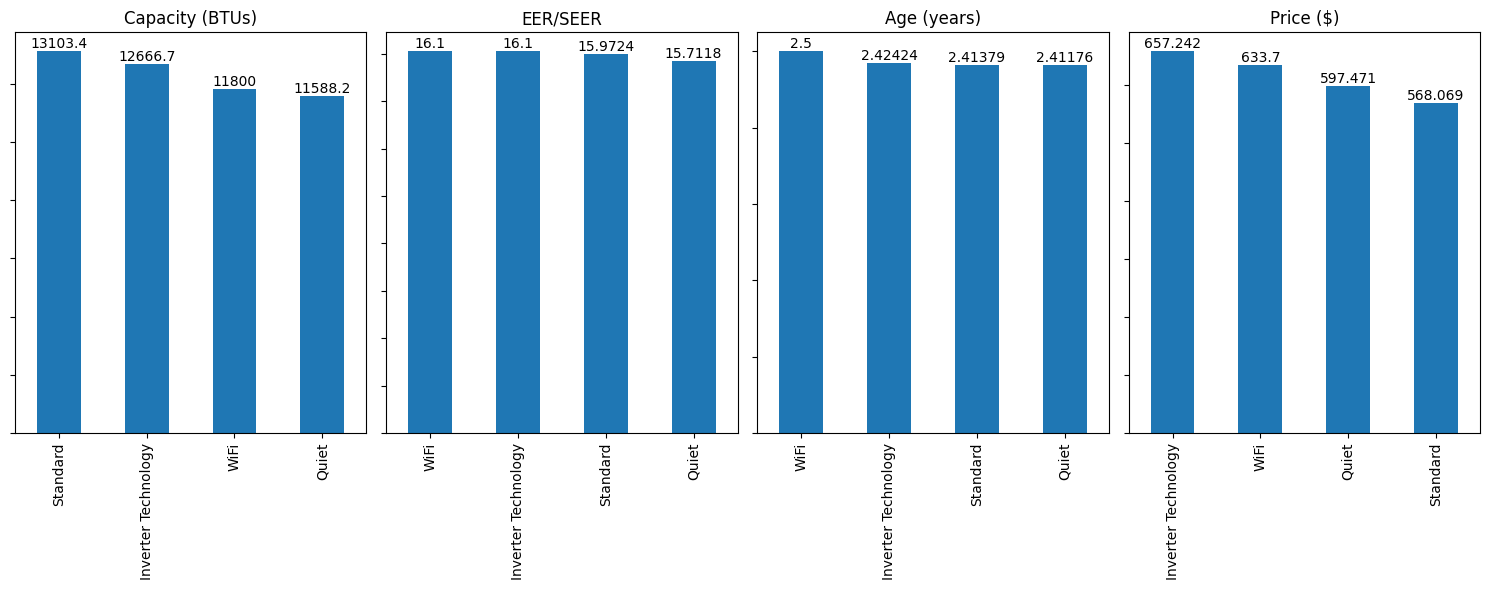

In [14]:
for i in feats:
    display(HTML("<h2>{}</h2>".format(i)))
    fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
    temp_df = df.copy()
    if i == "Feature Two":
        temp_df = temp_df[temp_df["Feature Two"] != "None"]
    grouped = temp_df.groupby(i)
    for j, k in enumerate(nums):

        mean = grouped[k].mean()

        mean = mean.sort_values(ascending=False)

        mean[:10].plot(kind="bar", ax=axes[j])

        for container in axes[j].containers:
            axes[j].bar_label(container)
        axes[j].set_yticklabels(())
        axes[j].set_ylabel("")
        axes[j].set_xlabel("")
        axes[j].set_title(k)

    plt.tight_layout()
    plt.show()

In [15]:
labels = ["Brand", "Type", "Features", "Location", "Feature One", "Feature Two"]

le = LabelEncoder()

for i in labels:
    df[i] = le.fit_transform(df[i].values)

In [16]:
corr = df[nums + labels].corr()
corr.style.background_gradient(cmap='coolwarm')

,Capacity (BTUs),EER/SEER,Age (years),Price ($),Brand,Type,Features,Location,Feature One,Feature Two
Capacity (BTUs),1.000000,0.117313,0.006390,-0.124492,-0.046085,-0.043671,-0.075095,0.049469,-0.076048,0.009380
EER/SEER,0.117313,1.000000,0.056646,-0.005136,0.047168,0.031036,0.002615,-0.087108,0.006131,-0.029176
Age (years),0.006390,0.056646,1.000000,0.015534,0.082480,-0.057758,-0.101236,-0.037084,-0.090335,0.025147
Price ($),-0.124492,-0.005136,0.015534,1.000000,-0.087198,0.044366,-0.010235,-0.047260,0.028705,-0.065694
Brand,-0.046085,0.047168,0.082480,-0.087198,1.000000,-0.132453,0.103598,0.151537,0.028737,0.170880
Type,-0.043671,0.031036,-0.057758,0.044366,-0.132453,1.000000,0.083212,-0.090528,0.073634,0.046480
Features,-0.075095,0.002615,-0.101236,-0.010235,0.103598,0.083212,1.000000,0.026797,0.798194,0.142587
Location,0.049469,-0.087108,-0.037084,-0.047260,0.151537,-0.090528,0.026797,1.000000,0.015917,0.089549
Feature One,-0.076048,0.006131,-0.090335,0.028705,0.028737,0.073634,0.798194,0.015917,1.000000,-0.189859
Feature Two,0.009380,-0.029176,0.025147,-0.065694,0.170880,0.046480,0.142587,0.089549,-0.189859,1.000000


In [17]:
data = df[labels + nums].values

scaler = MinMaxScaler()

data = scaler.fit_transform(data)

In [18]:
x = data[:, :-1]
y = data[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [19]:
def training(model):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    r2 = r2_score(pred, y_test)
    mse = mean_squared_error(pred, y_test)

    return r2*100, mse

In [20]:
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
etr = ExtraTreesRegressor()
abr = AdaBoostRegressor()
lnr = LinearRegression()
svr = SVR()
xgb = XGBRegressor()
lgb = LGBMRegressor()

models = [rfr, gbr, etr, abr,
         lnr, svr, xgb, lgb]

names = ["Random Forest", "Gradient Boosting", "Extra Trees", "Ada Boost",
        "Linear Regression", "Support Vector Machine", "XGBoost", "LightGBM"]

In [21]:
r2s, mses = [], []

for i in models:
    r2, mse = training(i)
    r2s += [r2]
    mses += [mse]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 9
[LightGBM] [Info] Start training from score 0.498231
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

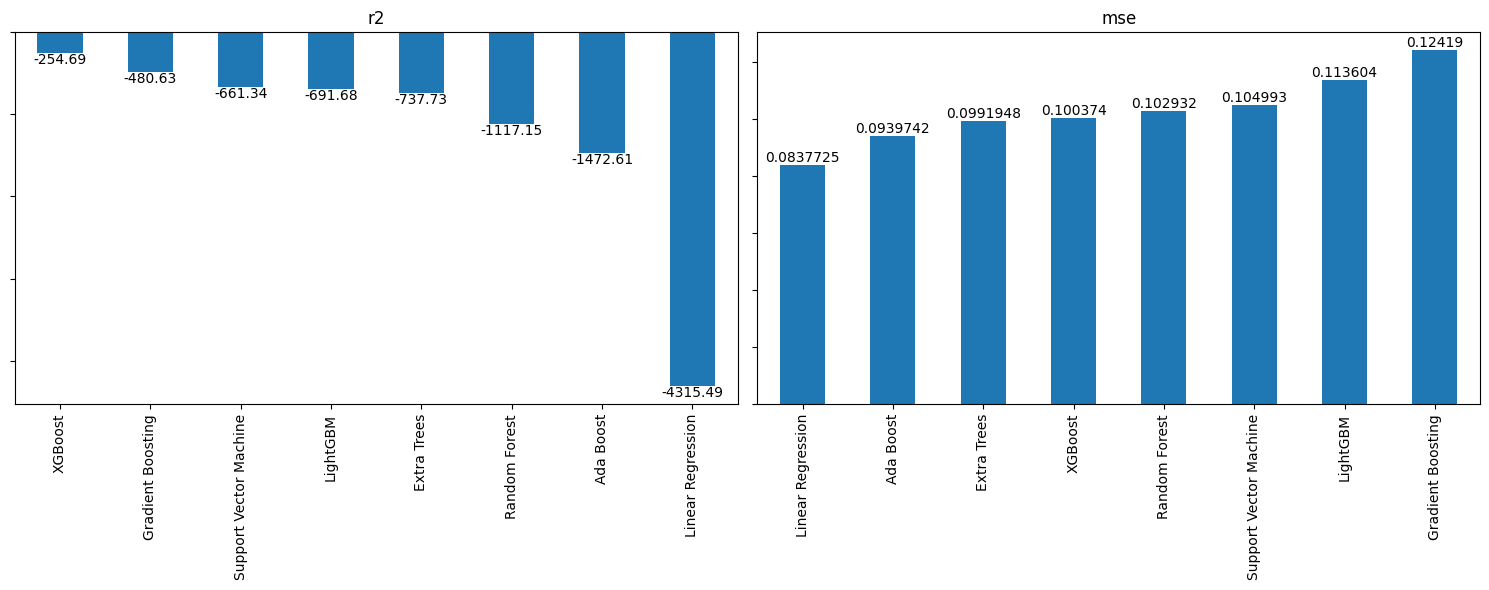

In [22]:
dd = pd.DataFrame({"r2": r2s, "mse": mses}, index=names)
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

index = 0

dd = dd.sort_values("r2", ascending=False)
dd["r2"] = round(dd["r2"], 2)

dd["r2"].plot(kind="bar", ax=axes[index])

for container in axes[index].containers:
    axes[index].bar_label(container)
axes[index].set_yticklabels(())
axes[index].set_ylabel("")
axes[index].set_xlabel("")
axes[index].set_title("r2")

index += 1

dd = dd.sort_values("mse", ascending=True)

dd["mse"].plot(kind="bar", ax=axes[index])

for container in axes[index].containers:
    axes[index].bar_label(container)
axes[index].set_yticklabels(())
axes[index].set_ylabel("")
axes[index].set_xlabel("")
axes[index].set_title("mse")

plt.tight_layout()
plt.show()